In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasist as ds
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.3)
sns.set_palette('viridis')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**We can see from the info that only the bmi column has missing values about 101**

In [4]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
for col in df.columns:
    print(f'For column {col}')
    print(f'{df[col].value_counts()}')
    print('****************************************************')

For column id
16380    1
58061    1
69918    1
23238    1
4807     1
        ..
35085    1
44375    1
5464     1
50522    1
49152    1
Name: id, Length: 5110, dtype: int64
****************************************************
For column gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
****************************************************
For column age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64
****************************************************
For column hypertension
0    4612
1     498
Name: hypertension, dtype: int64
****************************************************
For column heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
****************************************************
For column ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
*****************************************

**We'll drop id column as it won't be useful while working**

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Preparing the categorical values to be ready for training**

In [8]:
work_type = {i:j for (i,j) in zip(df['work_type'].unique(),range(len(df['work_type'].unique())))}

In [9]:
work_type

{'Private': 0,
 'Self-employed': 1,
 'Govt_job': 2,
 'children': 3,
 'Never_worked': 4}

In [10]:
Married = {'Yes':1,'No':0}

In [11]:
Residence = {'Urban':1,'Rural':0}

In [12]:
smoking_status = {i:j for (i,j) in zip(df['smoking_status'].unique(),range(len(df['smoking_status'].unique())))}

In [13]:
smoking_status

{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}

In [14]:
male = {'Male':1,'Female':0}

**We should drop Other in gender column as it won't be useful**

In [15]:
df.loc[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [16]:
df.drop(index=3116,inplace=True)

**Data Visualization**

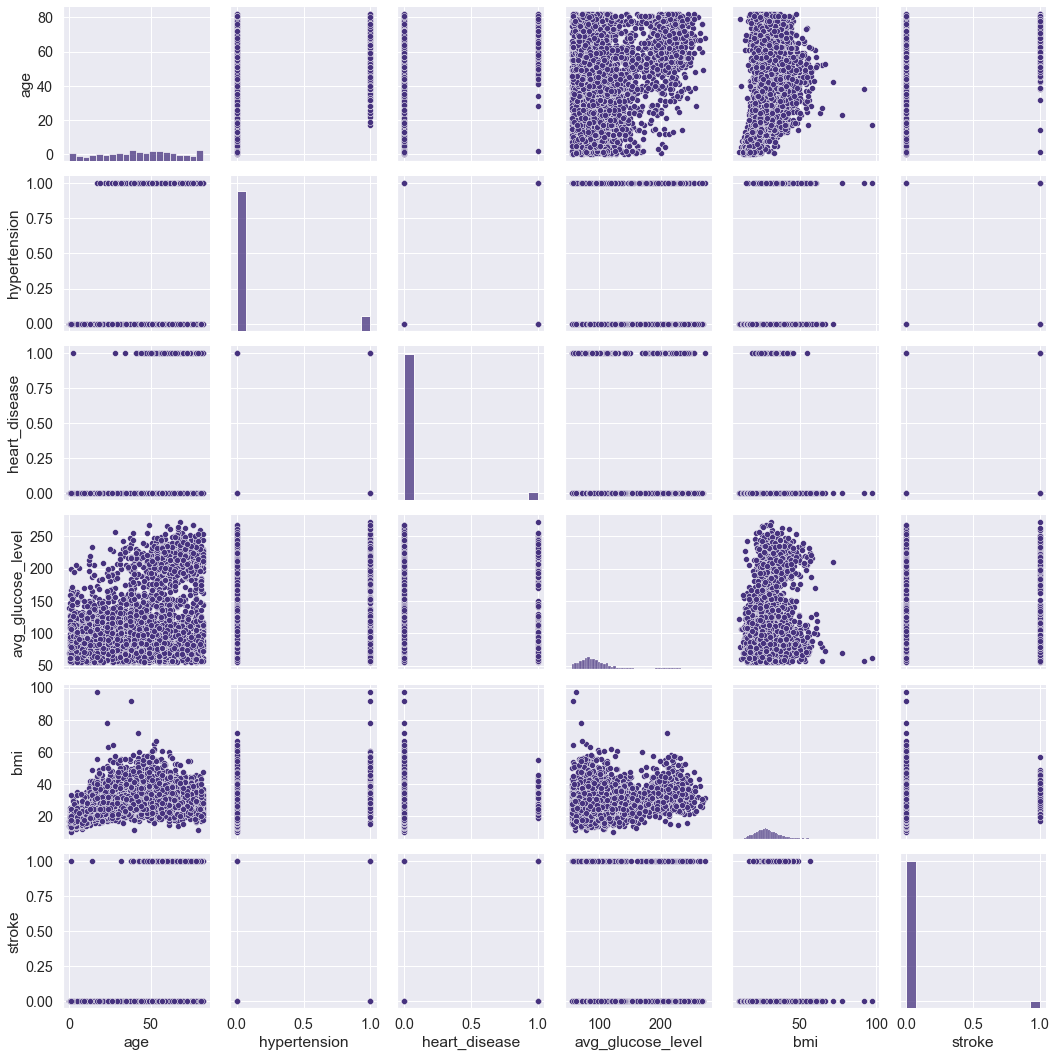

In [17]:
sns.pairplot(df)

<AxesSubplot:>

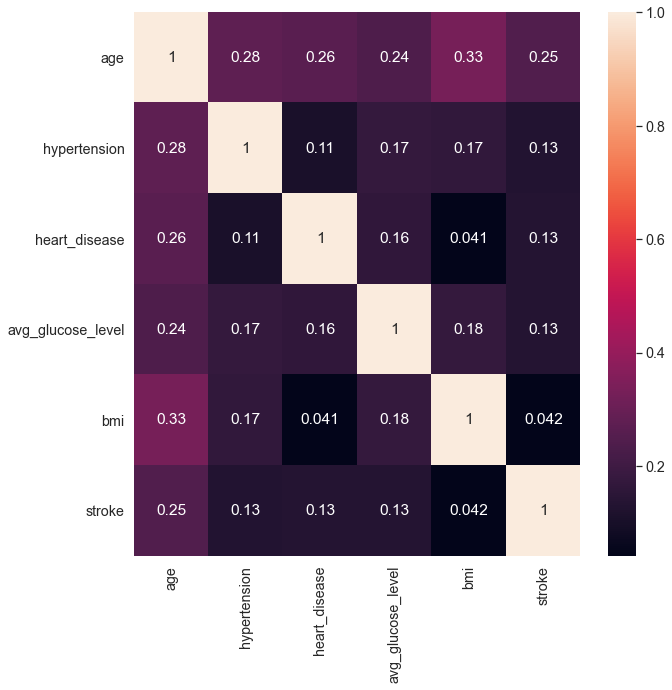

In [18]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

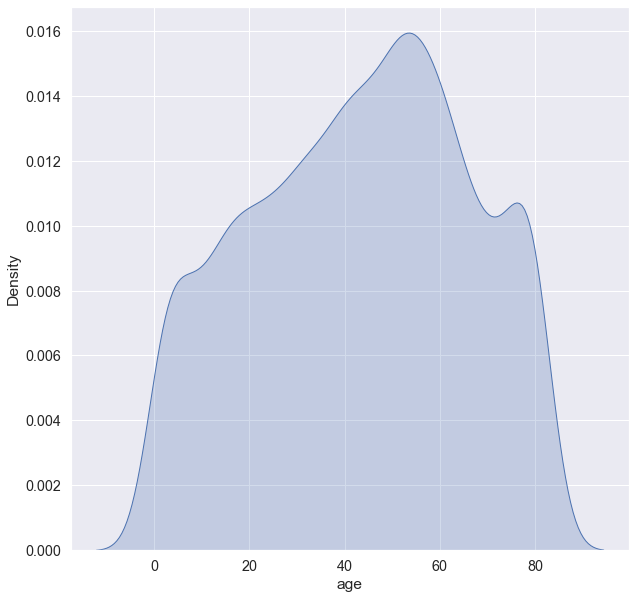

In [19]:
sns.kdeplot(df['age'],shade=True,color='b')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

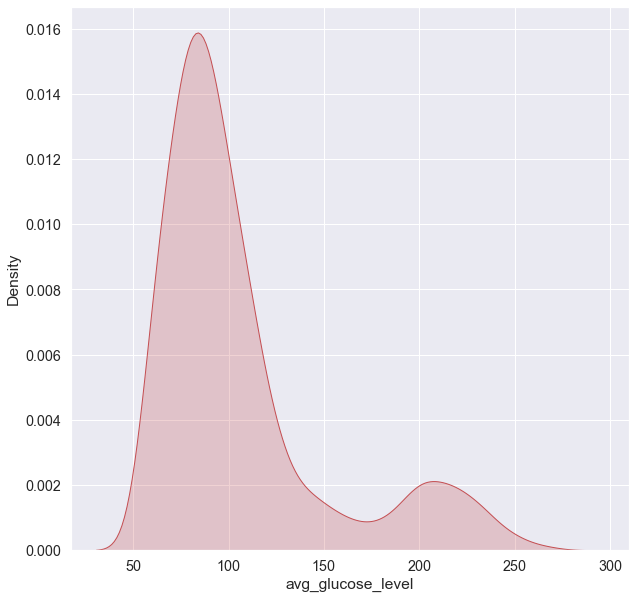

In [20]:
sns.kdeplot(df['avg_glucose_level'],shade=True,color='r')

<AxesSubplot:xlabel='bmi', ylabel='Density'>

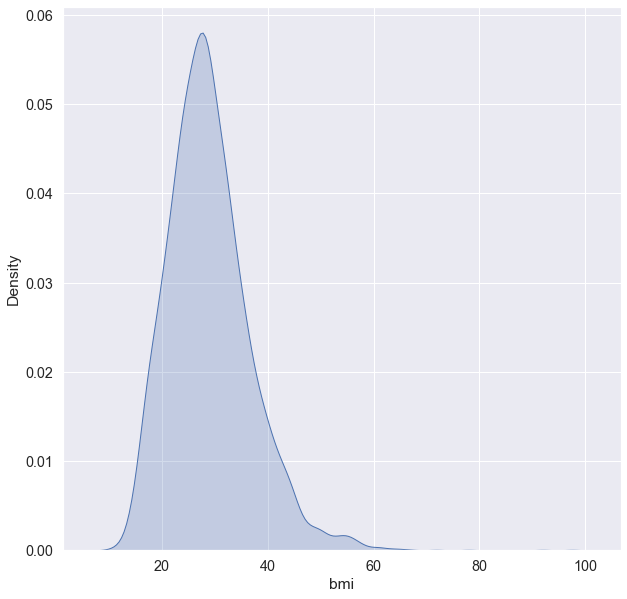

In [21]:
sns.kdeplot(df['bmi'],shade=True,color='b')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

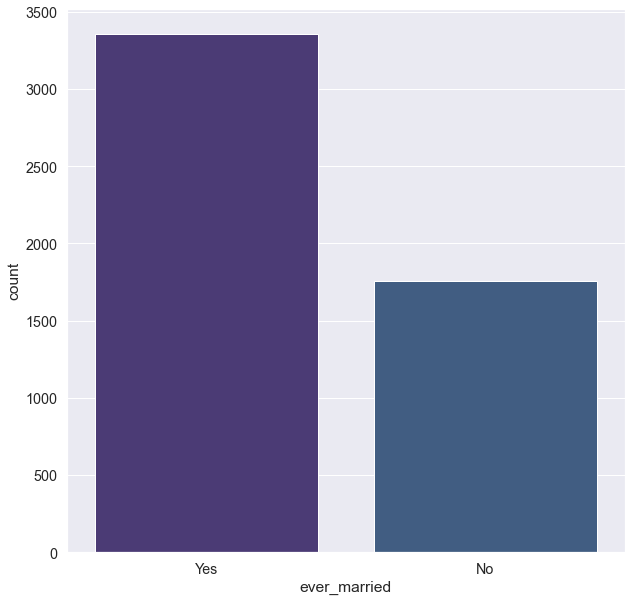

In [22]:
sns.countplot(df['ever_married'])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

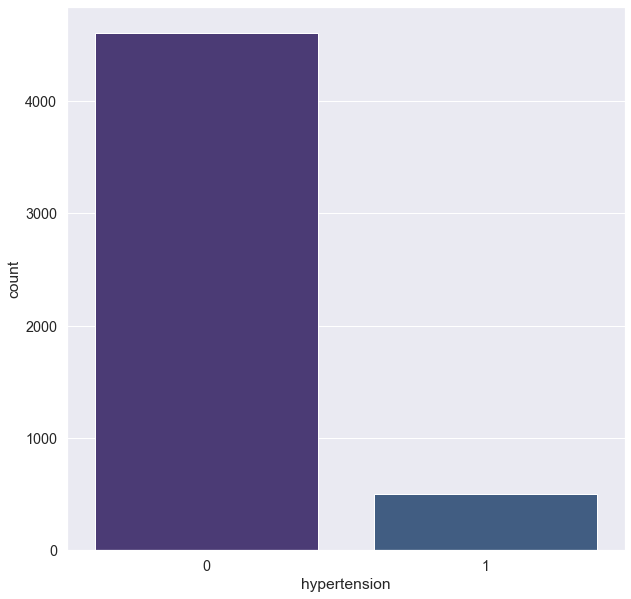

In [23]:
sns.countplot(df['hypertension'])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

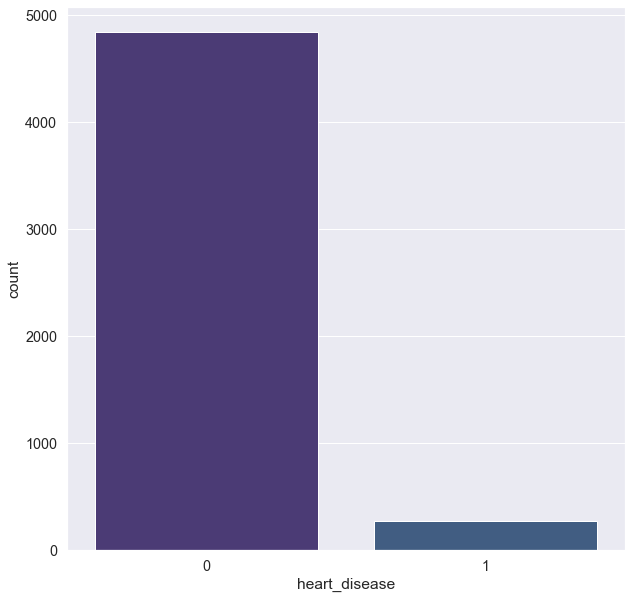

In [24]:
sns.countplot(df['heart_disease'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

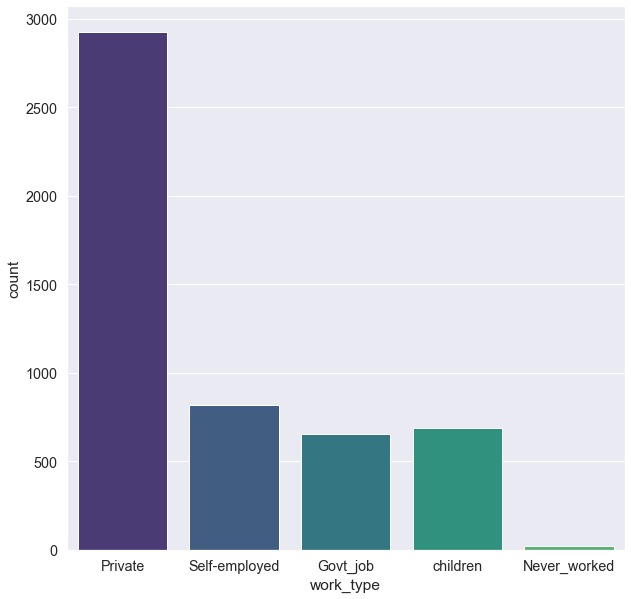

In [25]:
sns.countplot(df['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

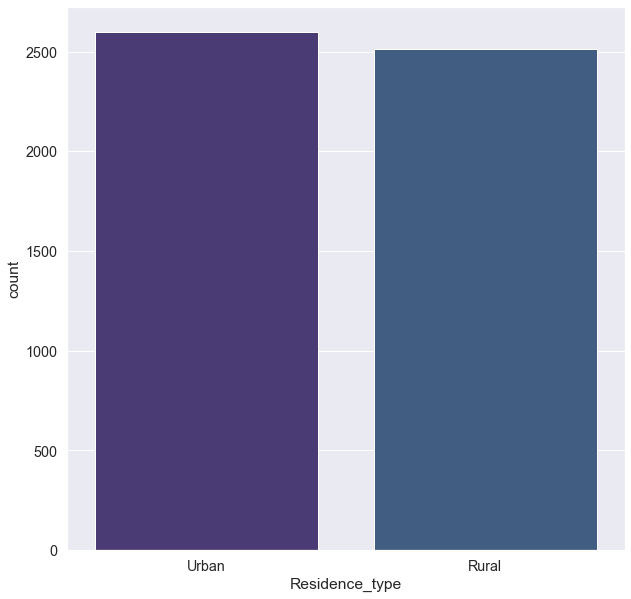

In [26]:
sns.countplot(df['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

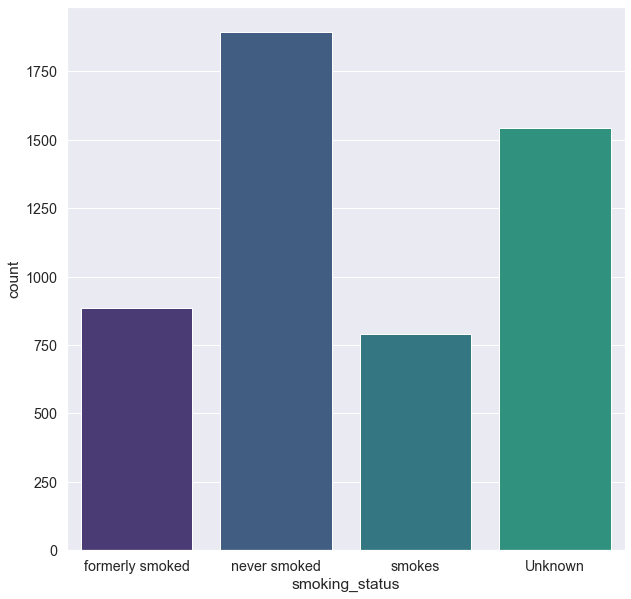

In [27]:
sns.countplot(df['smoking_status'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

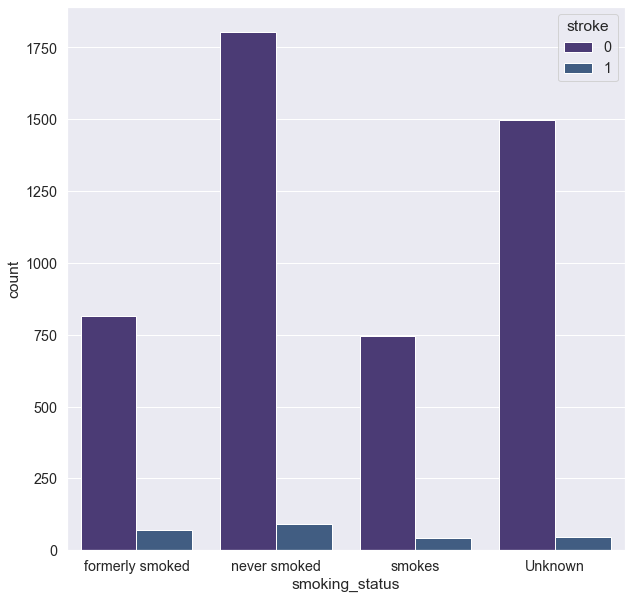

In [28]:
sns.countplot(df['smoking_status'],hue=df['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

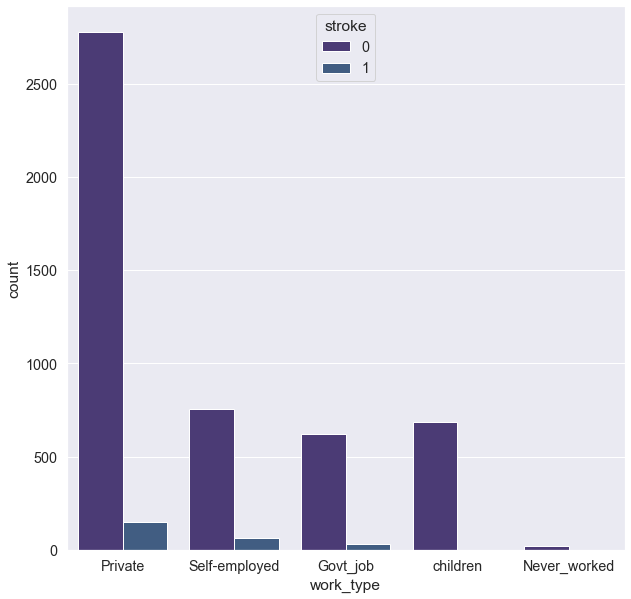

In [29]:
sns.countplot(df['work_type'],hue=df['stroke'])

**The ones who have Private work type are more likely to get stroke than others**

<AxesSubplot:xlabel='gender', ylabel='count'>

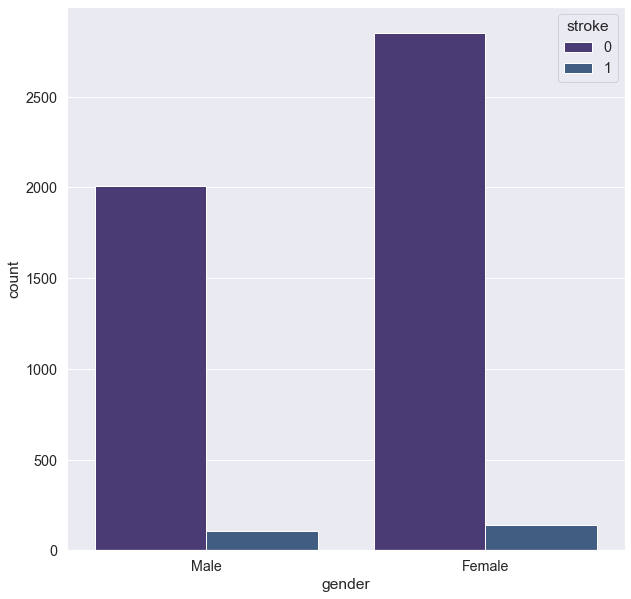

In [30]:
sns.countplot(df['gender'],hue=df['stroke'])

**The stroke in female is a bit more than males**

<AxesSubplot:xlabel='hypertension', ylabel='count'>

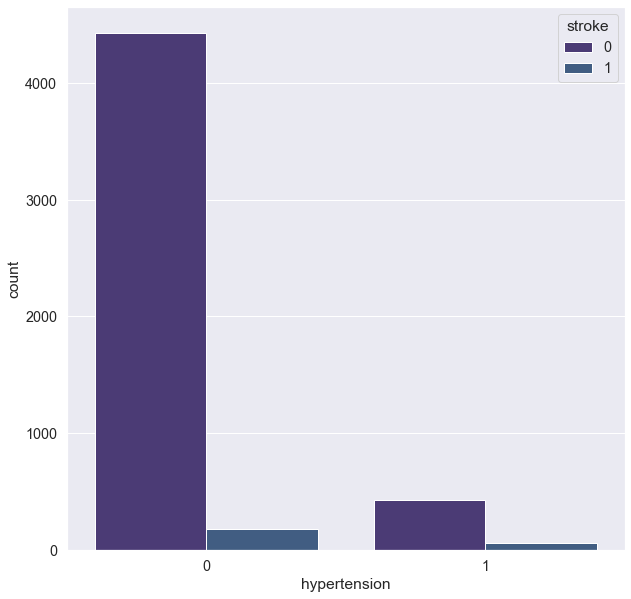

In [31]:
sns.countplot(df['hypertension'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

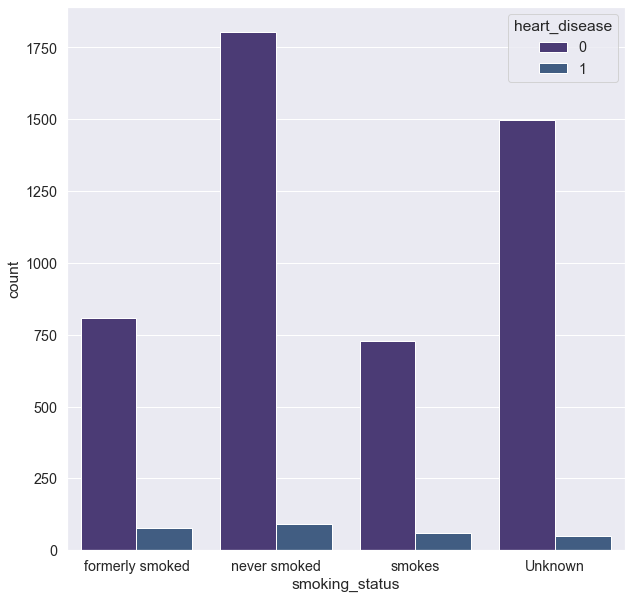

In [32]:
sns.countplot(df['smoking_status'],hue=df['heart_disease'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

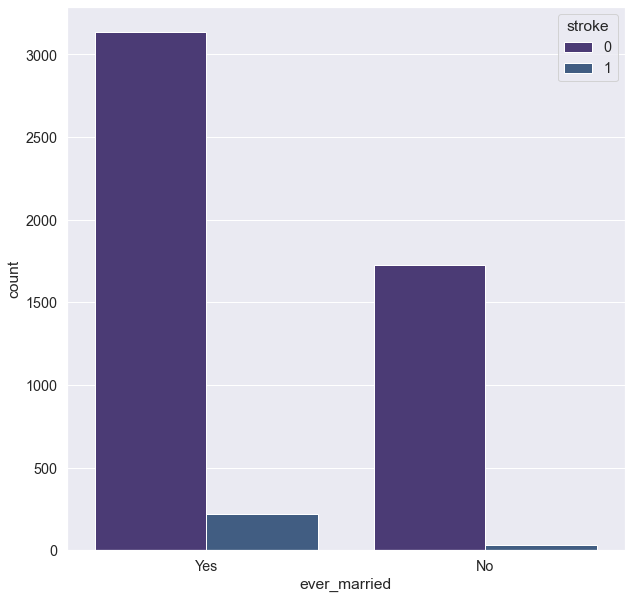

In [33]:
sns.countplot(df['ever_married'],hue=df['stroke'])

**From the dataset we can see married persons are more likely to get stroke**

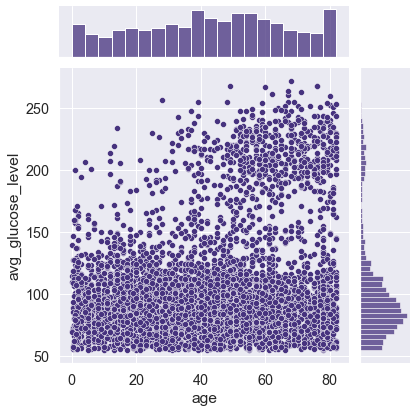

In [34]:
sns.jointplot(df['age'],df['avg_glucose_level'])

**Filling the missing values**

<AxesSubplot:xlabel='bmi', ylabel='Density'>

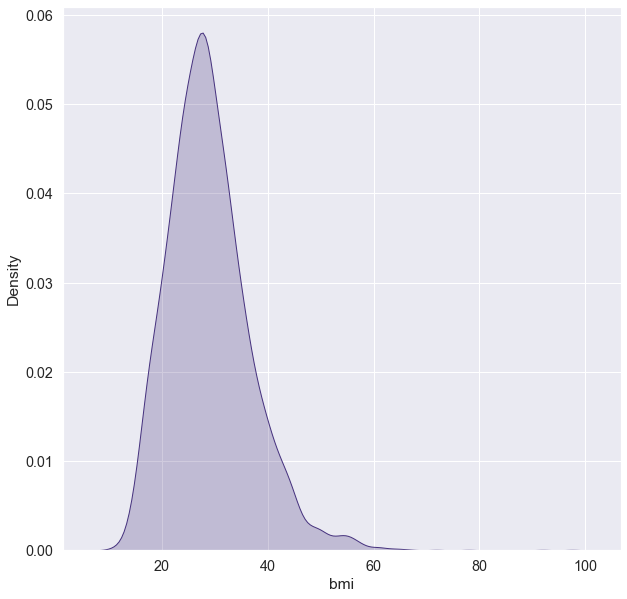

In [35]:
sns.kdeplot(df['bmi'],shade=True)

In [36]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

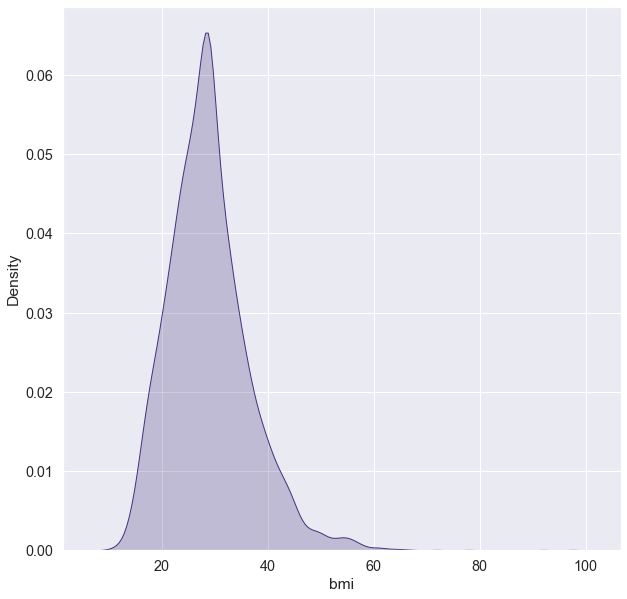

In [37]:
sns.kdeplot(df['bmi'],shade=True)

## Converting categorical to numerical

In [38]:
df['work_type'] = df['work_type'].map(work_type)
df['ever_married'] = df['ever_married'].map(Married)
df['Residence_type'] = df['Residence_type'].map(Residence)
df['smoking_status'] = df['smoking_status'].map(smoking_status)
df['gender'] = df['gender'].map(male)

In [39]:
df.rename(columns={'gender':'male'})

,male,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.60000,0,1
1,0,61.0,0,0,1,1,0,202.21,28.89456,1,1
2,1,80.0,0,1,1,0,0,105.92,32.50000,1,1
3,0,49.0,0,0,1,0,1,171.23,34.40000,2,1
4,0,79.0,1,0,1,1,0,174.12,24.00000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.89456,1,0
5106,0,81.0,0,0,1,1,1,125.20,40.00000,1,0
5107,0,35.0,0,0,1,1,0,82.99,30.60000,1,0
5108,1,51.0,0,0,1,0,0,166.29,25.60000,0,0


In [40]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.60000,0,1
1,0,61.0,0,0,1,1,0,202.21,28.89456,1,1
2,1,80.0,0,1,1,0,0,105.92,32.50000,1,1
3,0,49.0,0,0,1,0,1,171.23,34.40000,2,1
4,0,79.0,1,0,1,1,0,174.12,24.00000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.89456,1,0
5106,0,81.0,0,0,1,1,1,125.20,40.00000,1,0
5107,0,35.0,0,0,1,1,0,82.99,30.60000,1,0
5108,1,51.0,0,0,1,0,0,166.29,25.60000,0,0


## Training

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

In [42]:
Models = {'Logistic Regression':LogisticRegression(),
         'Random Forest':RandomForestClassifier(),
         'Decision Tree':DecisionTreeClassifier(),
         'SVC':SVC(),
         'XGB Classifier':XGBClassifier(),
         'MLP':MLPClassifier(),
         'KNN':KNeighborsClassifier()}

In [43]:
x = df.drop('stroke',axis=1)
y = df['stroke']

In [44]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 42, test_size=0.2)

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(x_train)

StandardScaler()

In [47]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
for name,model in Models.items():
    print(f'Model : {model}')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'Accuracy score : {accuracy_score(y_pred,y_test)}\n')

Model : LogisticRegression()
Accuracy score : 0.9393346379647749

Model : RandomForestClassifier()
Accuracy score : 0.9393346379647749

Model : DecisionTreeClassifier()
Accuracy score : 0.9070450097847358

Model : SVC()
Accuracy score : 0.9393346379647749

Model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[19:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: S

**The best model is MLP Classifier**

In [49]:
model = MLPClassifier()

In [50]:
model.fit(x_train,y_train)

MLPClassifier()

In [51]:
y_pred = model.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.9383561643835616

In [53]:
import joblib

In [54]:
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']